### Protein Secondary Structure Representation Learning Exercise

---

#### **Introduction**

In this exercise, we will focus on encoding protein secondary structure sequences into a numerical representation. Protein secondary structures, such as helices (H), sheets (E), and coils (C), are essential for understanding protein function. By converting these categorical structures into meaningful numerical representations, we can use them as input for downstream machine learning models.

You will encode secondary structure sequences into a representation. You need to work with partially completed code and fill in the missing parts to complete the implementation. 

---

#### **Objective**

1. Encode protein secondary structure sequences (Helix, Sheet, Coil) into a numerical representation.
2. Complete the missing parts of the code for a successful implementation.
3. Explore the encoded representations and understand their structure.

---

### **Code Implementation**

#### **Step 1: Import Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

---

#### **Step 2: Read Dataset**

The dataset contains protein sequences and their encoded secondary structure in 3- and 8- letter codes. We will use the 3-letter code. Each sequence contains three types of structures: Helix (H), Sheet (E), and Coil (C).

In [2]:
# Read data
data = pd.read_csv('data.csv')
data.sample(5)

,pdb_id,chain_code,seq,sst8,sst3,len,has_nonstd_aa
59,1YIJ,2,MGKKSKATKKRLAKLDNQNSRVPAWVMLKTDREVQRNHKRRHWRRN...,CCCCCHHHHHHHHHHHHHTSCCCHHHHHHTTCCCCCCTTCCCTTTS...,CCCCCHHHHHHHHHHHHHCCCCCHHHHHHCCCCCCCCCCCCCCCCC...,50,False
416,6INS,E,FVNQHLCGSHLVEALYLVCGERGFFYTPKGIVEQCCTSICSLYQLE...,CHHHHHHHHHHHHHHHHHHTTSCEEECTTHHHHHHSSSCCCHHHHG...,CHHHHHHHHHHHHHHHHHHCCCCEEECCCHHHHHHCCCCCCHHHHH...,50,False
320,4ULM,Y,AAQKSFRIKQKMAKAKKQNRPLPQWIRLRTNNTIRYNAKRRNWRRT...,CCSCCHHHHHHHHHHHHTCSCCCGGGGGSTTCCCCSCTTCCCTTTC...,CCCCCHHHHHHHHHHHHCCCCCCHHHHHCCCCCCCCCCCCCCCCCC...,50,False
84,2BWE,I,GILDPEERYEHQLRQLNDMGFFDFDRNVAALRRSGGSVQGALDSLL...,CCCCHHHHTHHHHHHHHHTTCCCHHHHHHHHHHTTTCHHHHHHHHT...,CCCCHHHHCHHHHHHHHHCCCCCHHHHHHHHHHCCCCHHHHHHHHC...,50,False
148,2MJZ,d,AEGDDPAKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFT...,CTTCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...,CCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH...,50,False


In [3]:
# Select the feature
sequences = data['seq'].values
sst = data['sst3'].values
print(sequences[0])
print(sst[0])

GREDILEQWVSGRKKLEELERDLRKLKKKIKKLEEDNPWLGNIKGIIGKY
CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHCCC


#### Alphafold3 model

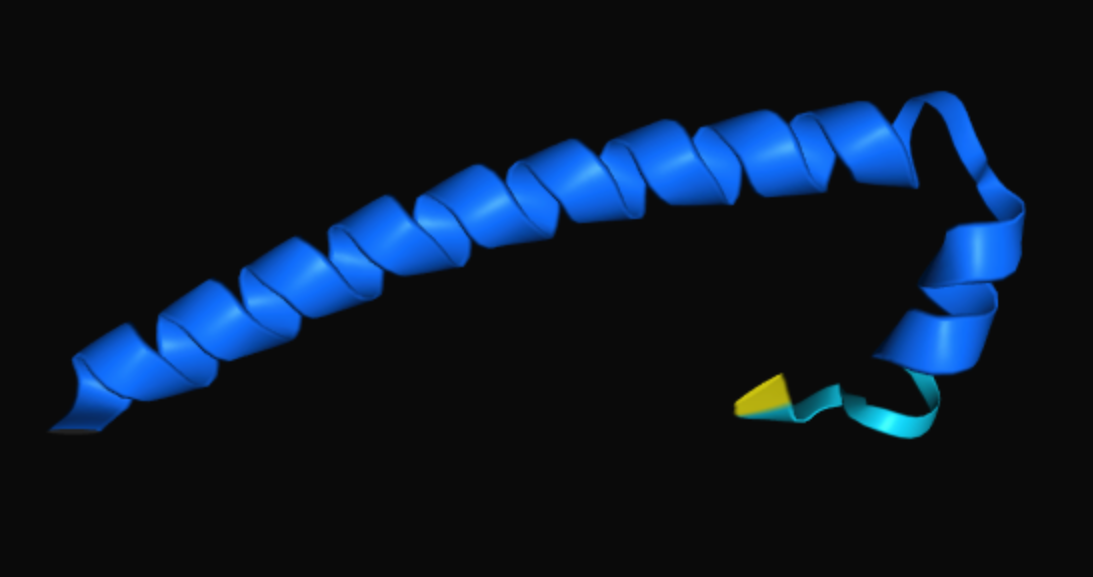

In [5]:
# Define constants
SEQ_LENGTH = 50  # Fixed sequence length
CLASS_MAP = {'H': 0, 'E': 1, 'C': 2}  # Map secondary structure characters to numeric labels
REV_CLASS_MAP = {v: k for k, v in CLASS_MAP.items()}  # Reverse map for visualization

---

#### **Step 3: Define an Encoder**


In [9]:
# Encoder for secondary structure sequences
def encode_sequence(sequence):
    """Encodes a sequence of secondary structure characters into a one-hot representation."""
    one_hot = np.zeros((SEQ_LENGTH, len(CLASS_MAP)))  # Initialize the one-hot matrix

    for i, char in enumerate(sequence):
        one_hot[i, CLASS_MAP[char]] = 1  # One-hot encoding for the current character

    return one_hot

In [11]:
# Test the encoder
encoded_sequence = encode_sequence(sst[0])
print("Encoded Sequence Shape:", encoded_sequence.shape)
print(sequences[0])
print(sst[0])
print(encoded_sequence)

Encoded Sequence Shape: (50, 3)
GREDILEQWVSGRKKLEELERDLRKLKKKIKKLEEDNPWLGNIKGIIGKY
CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHCCC
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


---

#### **Step 4: Visualize Encoded Representations**

/tmp/ipykernel_2013/3029441296.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.7, cmap='viridis')


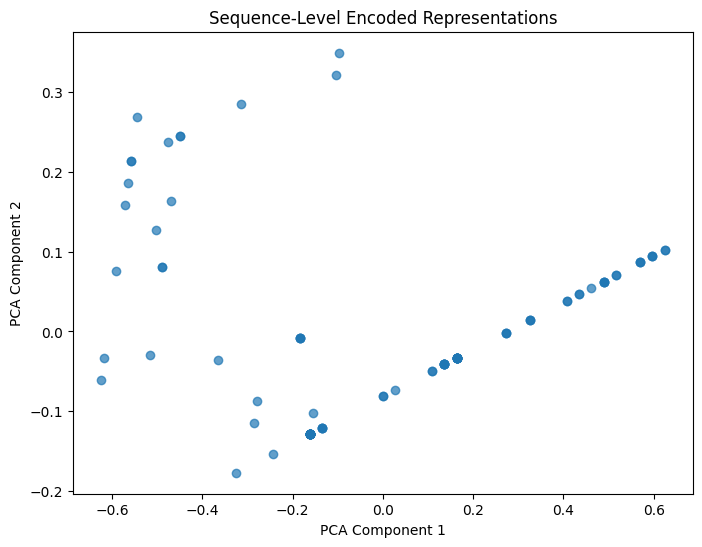

In [12]:
# Visualize sequence-level encoded representations
def visualize_encoded_sequences(sequences, num_samples=100):
    encoded_all = []
    for sequence in sequences[:num_samples]:
        encoded = encode_sequence(sequence)
        sequence_vector = np.mean(encoded, axis=0)  # Aggregate by averaging one-hot vectors
        encoded_all.append(sequence_vector)

    encoded_all = np.array(encoded_all)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(encoded_all)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.7, cmap='viridis')
    plt.title("Sequence-Level Encoded Representations")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Visualize
visualize_encoded_sequences(sst)


---

#### **Step 6: Additional Challenges**
- Use the 8-letter code for encoding.
- Explore different synthetic sequence generation rules, such as introducing biases (e.g., helices are more frequent).
- Extend the task to add another step of clustering encoded representations.


In [14]:
#Check the 8-letter code variables
np.unique(list("".join(data["sst8"].unique())))

array(['B', 'C', 'E', 'G', 'H', 'S', 'T'], dtype='<U1')

In [15]:
# Define constants
SEQ_LENGTH = 50  # Fixed sequence length
CLASS_MAP_2 = {'H': 0, 'E': 1, 'C': 2, 'B': 3, 'G': 4, 'S': 5, 'T': 6}  # Map secondary structure characters to numeric labels
REV_CLASS_MAP_2 = {v: k for k, v in CLASS_MAP_2.items()}  # Reverse map for visualization

In [16]:
# Encoder for secondary structure sequences with 8-letter code
def encode_sequence_2(sequence):
    """Encodes a sequence of secondary structure characters into a one-hot representation."""
    one_hot = np.zeros((SEQ_LENGTH, len(CLASS_MAP_2)))  # Initialize the one-hot matrix

    for i, char in enumerate(sequence):
        one_hot[i, CLASS_MAP_2[char]] = 1  # One-hot encoding for the current character

    return one_hot

In [17]:
# Test the encoder
encoded_sequence = encode_sequence_2(data['sst8'][0])
print("Encoded Sequence Shape:", encoded_sequence.shape)
print(data['seq'][0])
print(data['sst8'][0])
print(encoded_sequence)

Encoded Sequence Shape: (50, 7)
GREDILEQWVSGRKKLEELERDLRKLKKKIKKLEEDNPWLGNIKGIIGKY
CHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCTTHHHHHHHHTTC
[[0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [

/tmp/ipykernel_2013/178322756.py:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.7, cmap='viridis')


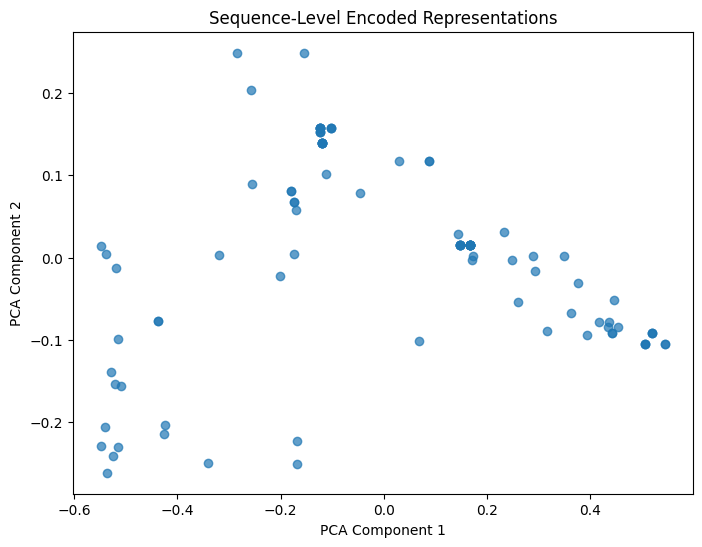

In [19]:
# Visualize sequence-level encoded representations
def visualize_encoded_sequences_2(sequences, num_samples=100):
    encoded_all = []
    for sequence in sequences[:num_samples]:
        encoded = encode_sequence_2(sequence)
        sequence_vector = np.mean(encoded, axis=0)  # Aggregate by averaging one-hot vectors
        encoded_all.append(sequence_vector)

    encoded_all = np.array(encoded_all)

    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(encoded_all)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.7, cmap='viridis')
    plt.title("Sequence-Level Encoded Representations")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Visualize
visualize_encoded_sequences_2(data['sst8'])